In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
inflation=pd.read_csv("inflation.csv")
unemployment_monthly=pd.read_csv("unemployment.csv")   #needs aggregation

In [44]:
#We rename the columns
inflation.columns = ['year', 'inflation']
unemployment_monthly.columns = ['year', 'unemployment']

In [45]:
#Removing the days and months with Luca's method rather that ChatGPT's .str accessor method
#inflation[year] = string[:4] for string in inflation[year]         #invalid sintax
#inflation[year] = [string[:4] for string in inflation[year]]       #year is not defined
inflation['year'] = [string[:4] for string in inflation['year']]    #we remove the days and months
#I should check the array[] = [array[]] operator

In [46]:
inflation.head(1)

,year,inflation
0,1960,1.457976


In [47]:
unemployment_monthly.head(2)    #I will leave unemployment like this in order to access the month

,year,unemployment
0,1960-01-01,5.2
1,1960-02-01,4.8


In [48]:
unemployment_monthly.columns=['month', 'unemployment']

In [49]:
inflation["year"]=inflation["year"].astype(int)    #not really necessary but gives me confort

In [50]:
unemployment_monthly.tail(2)

,month,unemployment
767,2023-12-01,3.7
768,2024-01-01,3.7


In [51]:
inflation.tail(2)      #no data for 2023, 2024
#why does inflation have more decimal places?

,year,inflation
61,2021,4.697859
62,2022,8.002800


In [52]:
unemployment_test = pd.DataFrame(columns=['year', 'unemployment'])

In [53]:
unemployment_test.shape          #this would need appends or concats

(0, 2)

In [54]:
unemployment = pd.DataFrame({'year': range(1960, 2025), 'unemployment': [0] * 65})    #finally found a command which does not use loops or appends
#769/12 = 64.083, so there are 64 years and one month of 2024
#I should modify the code to use len(unemployment)/12 + 1 if its modulo != 0, else 0 if its modulo = 0

In [55]:
unemployment.shape

(65, 2)

In [56]:
unemployment.tail(2)

,year,unemployment
63,2023,0
64,2024,0


In [57]:
print(unemployment_monthly["month"][0])      #I like this

1960-01-01


In [58]:
print(unemployment_monthly.loc[0,'month'])    #Why are the rows and columns switched now?

1960-01-01


In [59]:
astype_test=unemployment_monthly["month"][0]

In [60]:
print(astype_test[5:7])        #first index included, the second one not included

01


In [61]:
print(astype_test[5:7].astype(int))     #astype is apparently used with dataframes

AttributeError: 'str' object has no attribute 'astype'

In [62]:
print(int(astype_test[5:7]))    #success

1


In [63]:
unemployment_table = pd.DataFrame({f'month {i}': [0] * 65 for i in range(1, 13)})    #we create a dataframe with 12 columns and 65 rows

In [64]:
unemployment_table.tail(2)     #this is cool

,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12
63,0,0,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
unemployment_table.head(2)

,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
# Create a list of column names as integers from 1 to 12
column_index = list(range(1, 13))

# Create a list of row indices starting from 1960
row_index = list(range(1960, 2025))

# Create a DataFrame filled with zeros
unemployment_table2 = pd.DataFrame(0, index=row_index[:65], columns=column_index)

# Display the DataFrame
unemployment_table2.tail(2)

#From ChatGPT

,1,2,3,4,5,6,7,8,9,10,11,12
2023,0,0,0,0,0,0,0,0,0,0,0,0
2024,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
unemployment_table2.shape

(65, 12)

In [68]:
unemployment_table.shape

(65, 12)

In [69]:
print(unemployment_table2.iloc[0,0])    #indices do not change

0


In [70]:
type(astype_test)

str

In [71]:
if int(astype_test[:2])==19:
    print("we can use astype in conditionals")

we can use astype in conditionals


In [72]:
print(769%65)         #first attempt with modulo, will revisit

54


In [73]:
print(int(astype_test[:4])-1960)

0


In [74]:
i=0
for date_string in unemployment_monthly["month"]:
    unemployment_table.iloc[int(date_string[:4])-1960,int(date_string[5:7])-1]=unemployment_monthly.loc[i, "unemployment"]    #row, column
    i=i+1

C:\Users\THW\AppData\Local\Temp\ipykernel_9100\3817236677.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  unemployment_table.iloc[int(date_string[:4])-1960,int(date_string[5:7])-1]=unemployment_monthly.loc[i, "unemployment"]    #row, column
C:\Users\THW\AppData\Local\Temp\ipykernel_9100\3817236677.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  unemployment_table.iloc[int(date_string[:4])-1960,int(date_string[5:7])-1]=unemployment_monthly.loc[i, "unemployment"]    #row, column
C:\Users\THW\AppData\Local\Temp\ipykernel_9100\3817236677.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error i

In [75]:
unemployment_table.head(3)

,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12
0,5.2,4.8,5.4,5.2,5.1,5.4,5.5,5.6,5.5,6.1,6.1,6.6
1,6.6,6.9,6.9,7.0,7.1,6.9,7.0,6.6,6.7,6.5,6.1,6.0
2,5.8,5.5,5.6,5.6,5.5,5.5,5.4,5.7,5.6,5.4,5.7,5.5


In [76]:
unemployment_table.tail(2)

,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12
63,3.4,3.6,3.5,3.4,3.7,3.6,3.5,3.8,3.8,3.8,3.7,3.7
64,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
unemployment_monthly.tail(13)

,month,unemployment
756,2023-01-01,3.4
757,2023-02-01,3.6
758,2023-03-01,3.5
759,2023-04-01,3.4
760,2023-05-01,3.7
761,2023-06-01,3.6
762,2023-07-01,3.5
763,2023-08-01,3.8
764,2023-09-01,3.8
765,2023-10-01,3.8


In [78]:
i=0
for date_string in unemployment_monthly["month"]:
    unemployment_table2.iloc[int(date_string[:4])-1960,int(date_string[5:7])-1]=unemployment_monthly.loc[i, "unemployment"]    #row, column
    i=i+1

C:\Users\THW\AppData\Local\Temp\ipykernel_9100\3313597786.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  unemployment_table2.iloc[int(date_string[:4])-1960,int(date_string[5:7])-1]=unemployment_monthly.loc[i, "unemployment"]    #row, column
C:\Users\THW\AppData\Local\Temp\ipykernel_9100\3313597786.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  unemployment_table2.iloc[int(date_string[:4])-1960,int(date_string[5:7])-1]=unemployment_monthly.loc[i, "unemployment"]    #row, column
C:\Users\THW\AppData\Local\Temp\ipykernel_9100\3313597786.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error

In [79]:
unemployment_table2.tail(3)

,1,2,3,4,5,6,7,8,9,10,11,12
2022,4.0,3.8,3.6,3.7,3.6,3.6,3.5,3.6,3.5,3.6,3.6,3.5
2023,3.4,3.6,3.5,3.4,3.7,3.6,3.5,3.8,3.8,3.8,3.7,3.7
2024,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
unemployment_table.tail(5)     #why does this table fill values beyond Jan 2024?   Answer: It had unchange values from the last attempt

,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12
60,3.6,3.5,4.4,14.8,13.2,11.0,10.2,8.4,7.8,6.8,6.7,6.7
61,6.4,6.2,6.1,6.1,5.8,5.9,5.4,5.1,4.7,4.5,4.1,3.9
62,4.0,3.8,3.6,3.7,3.6,3.6,3.5,3.6,3.5,3.6,3.6,3.5
63,3.4,3.6,3.5,3.4,3.7,3.6,3.5,3.8,3.8,3.8,3.7,3.7
64,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
for i in range(64):
    unemployment.iloc[i,1]=unemployment_table.iloc[i].mean()

C:\Users\THW\AppData\Local\Temp\ipykernel_9100\2933931135.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.541666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  unemployment.iloc[i,1]=unemployment_table.iloc[i].mean()


In [82]:
unemployment.tail(3)

,year,unemployment
62,2022,3.633333
63,2023,3.625000
64,2024,0.000000


In [83]:
unemployment.iloc[64,1]=3.7   #setting the value for 2024

In [84]:
unemployment.tail(3)

,year,unemployment
62,2022,3.633333
63,2023,3.625000
64,2024,3.700000


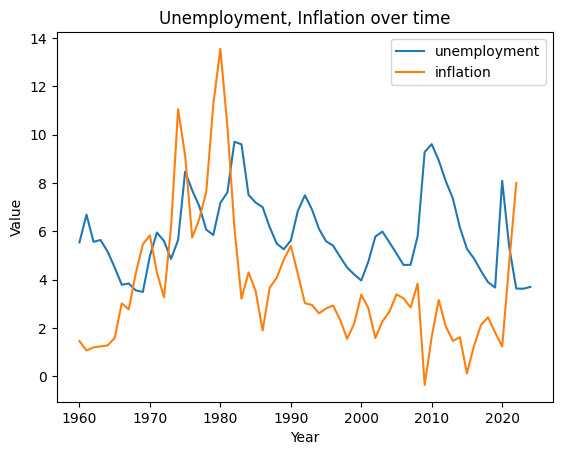

In [85]:
#Plot unemployment and inflation

plt.plot(unemployment['year'], unemployment['unemployment'], label='unemployment')
plt.plot(inflation['year'], inflation['inflation'], label='inflation')

"""
df11 = unemployment
df22 = inflation

# Extracting the year and variables from each DataFrame
year1, variable1 = df11['year'], df11['unemployment']
year2, variable2 = df22['year'], df22['inflation']



# Plotting using Matplotlib
plt.plot(year1, variable1, label='unemployment')
plt.plot(year2, variable2, label='inflation')
"""

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Unemployment, Inflation over time')
plt.legend()

plt.show()